### Importing our Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [7]:
#setting our columns to display full values
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:20,.2f}'.format)

### Installing important libraries

In [ ]:
#i had to install this to work on this excel file 
!pip install xlrd

### Reading our Dataset and Column Descriptions to our notebook


In [8]:
#importing the data
df = pd.read_excel("Week2_challenge_data_source.xlsx")

In [9]:
#importing the data description
df_descript = pd.read_csv("Field Descriptions - Sheet1.csv")

Removing all columns with space and lowering the  letters of the columns

In [10]:
df.columns = [label.replace(' ', '_').lower() for label in df.columns]

### Exploring our Datasets

I want to try to understand the data here and check for missing values 

We start with understanding what different columns stand for, here is a view of the different columns meaning this helps others understand this data too 

In [12]:
df_descript

Fields  \
0                                  bearer id   
1                                  Dur. (ms)   
2                                      Start   
3                                   Start ms   
4                                        End   
5                                     End ms   
6                                   Dur. (s)   
7                                       IMSI   
8                              MSISDN/Number   
9                                       IMEI   
10                        Last Location Name   
11                           Avg RTT DL (ms)   
12                           Avg RTT UL (ms)   
13                   Avg Bearer TP DL (kbps)   
14                   Avg Bearer TP UL (kbps)   
15               TCP DL Retrans. Vol (Bytes)   
16               TCP UL Retrans. Vol (Bytes)   
17                       DL TP < 50 Kbps (%)   
18            50 Kbps < DL TP < 250 Kbps (%)   
19             250 Kbps < DL TP < 1 Mbps (%)   
20                        DL TP > 1 Mbps (%)   
21                       UL TP < 10 Kbps (%)   
22             10 Kbps < UL TP < 50 Kbps (%)   
23            50 Kbps < UL TP < 300 Kbps (%)   
24                      UL TP > 300 Kbps (%)   
25                           HTTP DL (Bytes)   
26                           HTTP UL (Bytes)   
27                 Activity Duration DL (ms)   
28                 Activity Duration UL (ms)   
29                               Dur. (ms).1   
30                      Handset Manufacturer   
31                              Handset Type   
32           Nb of sec with 125000B < Vol DL   
33     Nb of sec with 1250B < Vol UL < 6250B   
34  Nb of sec with 31250B < Vol DL < 125000B   
35            Nb of sec with 37500B < Vol UL   
36    Nb of sec with 6250B < Vol DL < 31250B   
37    Nb of sec with 6250B < Vol UL < 37500B   
38             Nb of sec with Vol DL < 6250B   
39             Nb of sec with Vol UL < 1250B   
40                   Social Media DL (Bytes)   
41                   Social Media UL (Bytes)   
42                        YouTube DL (Bytes)   
43                        YouTube UL (Bytes)   
44                        Netflix DL (Bytes)   
45                        Netflix UL (Bytes)   
46                         Google DL (Bytes)   
47                         Google UL (Bytes)   
48                          Email DL (Bytes)   
49                          Email UL (Bytes)   
50                         Gaming DL (Bytes)   
51                         Gaming UL (Bytes)   
52                                  Other DL   
53                                  Other UL   
54                          Total DL (Bytes)   
55                          Total UL (Bytes)   

                                                                            Description  
0                                                                xDr session identifier  
1                                                     Total Duration of the xDR (in ms)  
2                                         Start time of the xDR (first frame timestamp)  
3                 Milliseconds offset of start time for the xDR (first frame timestamp)  
4                                            End time of the xDR (last frame timestamp)  
5                     Milliseconds offset of end time of the xDR (last frame timestamp)  
6                                                      Total Duration of the xDR (in s)  
7                                              International Mobile Subscriber Identity  
8                         MS International PSTN/ISDN Number of mobile - customer number  
9                                               International Mobile Equipment Identity  
10                          User location call name (2G/3G/4G) at the end of the bearer  
11                     Average Round Trip Time measurement Downlink direction (msecond)  
12                       Average Round Trip Time measurement Uplink direction (msecond)  
13                Average Bearer Throughp

This shows us the different data types and number of non-null values in each columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn/number                             148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

This shows us the Numbers of Rows and Columns in our dataset 

In [10]:
df.shape 

(150001, 55)

The numbers of unique values in each columns are shown below to understand a little bit, how the data is distributed 

In [11]:
df.nunique().sort_values(ascending=False)

total_dl_(bytes)                            149987
other_dl_(bytes)                            149986
gaming_dl_(bytes)                           149983
total_ul_(bytes)                            149728
youtube_dl_(bytes)                          149547
netflix_dl_(bytes)                          149518
netflix_ul_(bytes)                          149490
youtube_ul_(bytes)                          149477
gaming_ul_(bytes)                           149316
other_ul_(bytes)                            149284
google_dl_(bytes)                           149024
google_ul_(bytes)                           147267
email_dl_(bytes)                            146916
social_media_dl_(bytes)                     146856
email_ul_(bytes)                            138699
bearer_id                                   134709
dur._(ms).1                                 122871
start                                       111881
imei                                        107270
imsi                           

### Analysis of Null Values in our dataset

I want to analyze my dataset to understand where the null values are and how to deal with them 

In [15]:
#i am trying to understanding the null values here by analyzing the percentage of missing values in each columns
null = df.isna().sum().sort_values(ascending = False)
null_per = (null/150001) * 100
null_perc = pd.DataFrame(null_per)
null_perc.head(10)

0
nb_of_sec_with_37500b_<_vol_ul                          86.84
nb_of_sec_with_6250b_<_vol_ul_<_37500b                  74.56
nb_of_sec_with_125000b_<_vol_dl                         65.02
tcp_ul_retrans._vol_(bytes)                             64.43
nb_of_sec_with_31250b_<_vol_dl_<_125000b                62.39
nb_of_sec_with_1250b_<_vol_ul_<_6250b                   61.93
nb_of_sec_with_6250b_<_vol_dl_<_31250b                  58.88
tcp_dl_retrans._vol_(bytes)                             58.76
http_ul_(bytes)                                         54.54
http_dl_(bytes)                                         54.32

I have noticed the columns with a lot of missing values and would decide now how to impute this, i would be mean as already stated for numerical columns and median to replace null for Categorical columns 

I would start with getting all the missing numerical values in our missing data, i would turn all the values in null percent to a list of columns  

In [16]:
null_perc.reset_index(inplace=True)
missing = list(null_perc['index'])

We would append numerical values that are missing to one list and the categorical columns to another list

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numcols =[]
catcols = []
for data in missing:
    if df[data].dtypes in numerics:
        numcols.append(data)
    else:
        catcols.append(data)    

There are some values that are numerical but are not supposed to be like the IMEI, IMSI,MSISDN we would remove them from our list of numerical values

we would create a new list for the categorical values remove them from the numerical list and add to the categorical columns

In [18]:
catcoladd =['imei', 'imsi','msisdn/number']
for c in catcoladd:
    numcols.remove(c)

In [19]:
catcols.extend(catcoladd)

We would start with filling the missing values in the numerical column with the mean of the column

In [20]:
for col in numcols:
    df[col] = df[col].fillna(df[col].mean())

Confirm if what we did work

In [21]:
df[numcols].isnull().any()

nb_of_sec_with_37500b_<_vol_ul              False
nb_of_sec_with_6250b_<_vol_ul_<_37500b      False
nb_of_sec_with_125000b_<_vol_dl             False
tcp_ul_retrans._vol_(bytes)                 False
nb_of_sec_with_31250b_<_vol_dl_<_125000b    False
nb_of_sec_with_1250b_<_vol_ul_<_6250b       False
nb_of_sec_with_6250b_<_vol_dl_<_31250b      False
tcp_dl_retrans._vol_(bytes)                 False
http_ul_(bytes)                             False
http_dl_(bytes)                             False
avg_rtt_dl_(ms)                             False
avg_rtt_ul_(ms)                             False
nb_of_sec_with_vol_ul_<_1250b               False
10_kbps_<_ul_tp_<_50_kbps_(%)               False
ul_tp_<_10_kbps_(%)                         False
ul_tp_>_300_kbps_(%)                        False
50_kbps_<_ul_tp_<_300_kbps_(%)              False
nb_of_sec_with_vol_dl_<_6250b               False
50_kbps_<_dl_tp_<_250_kbps_(%)              False
dl_tp_<_50_kbps_(%)                         False


Next we would try to fill the categorical variables by the mode since we cannot use mean here

we would have to convert all the new columns we added to object data type

In [22]:
df[catcoladd] = df[catcoladd].astype('object')

In [23]:
df[catcoladd].dtypes

imei             object
imsi             object
msisdn/number    object
dtype: object

In [24]:
for col in catcols:
    df[col] = df[col].fillna(df[col].mode()[0])

we would check all our categorical column to see if what we did worked 

In [25]:
df[catcols].isnull().any()

last_location_name      False
handset_type            False
handset_manufacturer    False
end                     False
start                   False
bearer_id               False
imei                    False
imsi                    False
msisdn/number           False
dtype: bool

### User Overview Analysis

#### Identifying the top 10 handsets used by the customers.

In [26]:
top_ten = df['handset_type'].value_counts(ascending = False).head(10).reset_index()
top_ten = top_ten.rename(columns={'index':"Handset Type","handset_type":"Count"})
top_ten

Handset Type  Count
0              Huawei B528S-23A  20324
1       Apple iPhone 6S (A1688)   9419
2        Apple iPhone 6 (A1586)   9023
3                     undefined   8987
4        Apple iPhone 7 (A1778)   6326
5       Apple iPhone Se (A1723)   5187
6        Apple iPhone 8 (A1905)   4993
7       Apple iPhone Xr (A2105)   4568
8  Samsung Galaxy S8 (Sm-G950F)   4520
9        Apple iPhone X (A1901)   3813

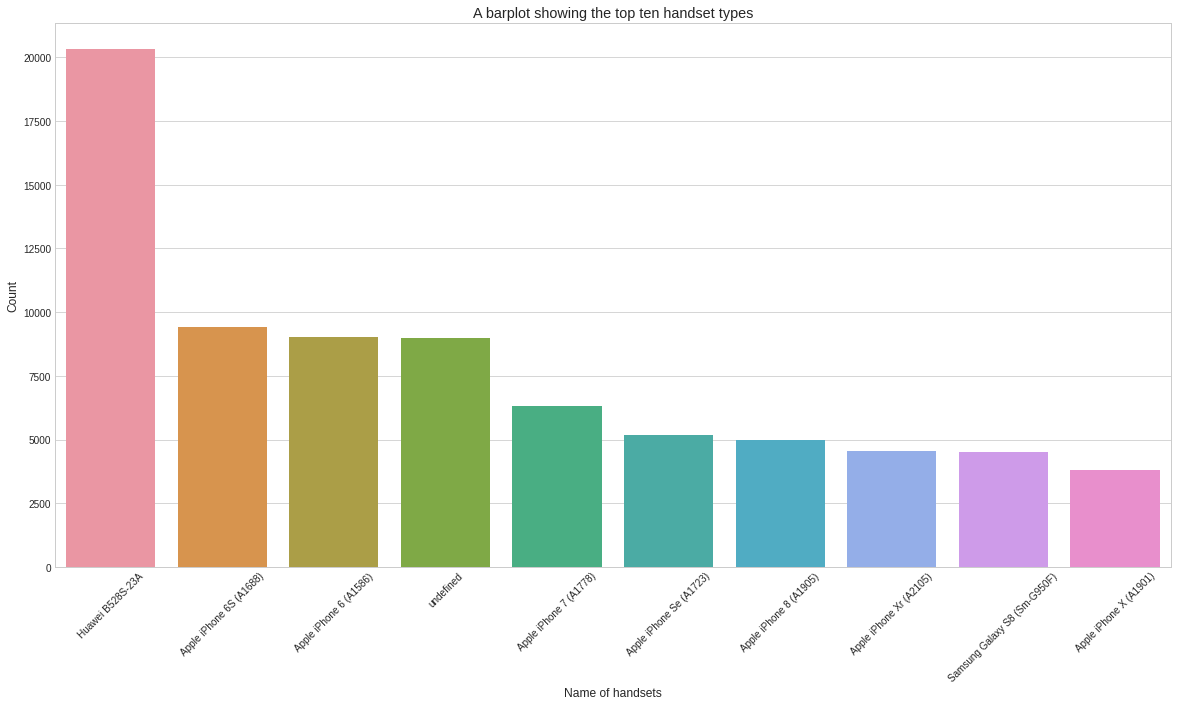

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x = top_ten['Handset Type'], y = top_ten['Count'])
plt.xlabel('Name of handsets')
plt.xticks(rotation=45)
plt.title('A barplot showing the top ten handset types');

#### Top 3 Handset Manufacturer

In [29]:
top_three = df['handset_manufacturer'].value_counts(ascending = False).head(3).reset_index()
top_three = top_three.rename(columns={'index':"Handset Manufacturer","handset_manufacturer":"Count"})
top_three

Handset Manufacturer  Count
0                Apple  60137
1              Samsung  40839
2               Huawei  34423

#### Top 5 handset per Handset Manufacturer

In [30]:
top_fivemanf = df.groupby(['handset_manufacturer','handset_type'])['handset_type'].count().reset_index(name="count")

In [31]:
top_fivemanf=top_fivemanf.sort_values(['handset_manufacturer', 'count']).groupby('handset_manufacturer').head(5)
top_fivemanf.head()

handset_manufacturer                       handset_type  \
0  A-Link Telecom International Co Limited         A-Link Telecom I. Cubot A5   
1  A-Link Telecom International Co Limited  A-Link Telecom I. Cubot Note Plus   
2  A-Link Telecom International Co Limited     A-Link Telecom I. Cubot Note S   
3  A-Link Telecom International Co Limited       A-Link Telecom I. Cubot Nova   
4  A-Link Telecom International Co Limited      A-Link Telecom I. Cubot Power   

   count  
0      1  
1      1  
2      1  
3      1  
4      1

####  Make a short interpretation to the marketing team 


     Top ten handset

    From the list of top ten Handset we can observe that the most purchase unique Handset is *Huawei B528S-23A* is our most used handset while Apple IPhone is the most purchased in our Top ten Handset, Samsung also appear in the list as one of the top ten phone
    

     Recommendations
        we should try to make our service tailored for this brands.

#### Overview of Users Behavior


Bearer ID according to our data description is unique for each session, the bearer ID is our unique session identifier so to identify each session we would the bearer ID here to group them, and count them to know the total number of Unique sessions

In this analysis we would be using MSISDN as a unique identifier for each users

####  number of xDR sessions

I tried to check the kind of values in the bearer_id column

In [32]:
df['bearer_id'].value_counts()

                        991
13042425979269199872     16
13042425965944199168     10
13042425972278300672      9
13042425978774599680      9
13042425981873399808      9
13042425974582800384      9
13042425975039100928      8
13114483561758900224      8
13042425975793299456      8
13042425960483100672      8
13042425965962999808      7
13114483562322999296      7
13042425965924900864      7
13042425966004299776      7
13042425965357199360      7
13042425960512700416      7
13042425965987600384      7
13042425978916499456      7
13042425978965499904      7
13042425970518099968      7
13042425974769899520      7
13042425965128800256      7
13042425963481300992      6
13042425960527099904      6
13042425968561399808      6
13042425970894600192      6
13042425960562999296      6
13114483573175400448      6
13042425983641300992      6
13042425979269300224      6
13042425965347999744      6
7349883248194010112       6
13042425979265599488      6
13042425965923299328      6
13114483554495700992

    The first value with that appears 991 appears to be missing,
    I dropped all rows without Bearer ID, since we
    cannot confirm if they had more than one session or not

the total number of unique Session in our dataset is the number of unique Bearer ID

In [53]:
bearer_id = pd.DataFrame(df[['msisdn/number','bearer_id']])
bearer_id= bearer_id.loc[bearer_id['bearer_id'] != '']

In [56]:
NumberOfSessions=bearer_id.groupby('msisdn/number').agg({'bearer_id': 'count'})
NumberOfSessions=NumberOfSessions.rename(columns= {'bearer_id': 'xDR sessions'})

In [57]:
NumberOfSessions.head()

xDR sessions
msisdn/number                  
33,601,001,722.00             1
33,601,001,754.00             1
33,601,002,511.00             1
33,601,007,832.00             1
33,601,008,617.00             2

#### Session Duration

In [44]:
SessionDuration =df.groupby('msisdn/number').agg({'dur._(ms).1': 'sum'})
#here is the duration for first five rows in our dataset
SessionDuration=SessionDuration.rename(columns= {'dur._(ms).1': 'sessions duration(ms)'})
SessionDuration.head()

sessions duration(ms)
msisdn/number                           
33,601,001,722.00         116,720,140.00
33,601,001,754.00         181,230,963.00
33,601,002,511.00         134,969,374.00
33,601,007,832.00          49,878,024.00
33,601,008,617.00          37,104,453.00

#### The total download (DL) and upload (UL) data

In [33]:
UpDownload_user = df[['msisdn/number','total_ul_(bytes)','total_dl_(bytes)']]
UpDownload_user = UpDownload_user.groupby('msisdn/number').sum()

In [68]:
UpDownload_user.head()

total_ul_(bytes)     total_dl_(bytes)  \
msisdn/number                                                 
33,601,001,722.00        36,053,108.00       842,637,466.00   
33,601,001,754.00        36,104,459.00       120,755,184.00   
33,601,002,511.00        39,306,820.00       556,659,663.00   
33,601,007,832.00        20,327,526.00       401,993,172.00   
33,601,008,617.00        94,280,527.00     1,363,130,417.00   

                            total data  
msisdn/number                           
33,601,001,722.00       878,690,574.00  
33,601,001,754.00       156,859,643.00  
33,601,002,511.00       595,966,483.00  
33,601,007,832.00       422,320,698.00  
33,601,008,617.00     1,457,410,944.00

In [67]:
UpDownload_user['total data'] = UpDownload_user['total_dl_(bytes)'] + UpDownload_user['total_ul_(bytes)']

#### The total data volume (in Bytes) for each application

In [46]:
df["social_media"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["google"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['email'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['youtube'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['netflix'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["gaming"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['other']=df["other_dl_(bytes)"]+df["other_ul_(bytes)"]

In [38]:
applicationDownUp =df[['msisdn/number','social_media', 'google','email', 'youtube','netflix', 'gaming','other']]

In [40]:
sumforapp =applicationDownUp.groupby('msisdn/number').sum()
sumforapp.head()

social_media               google  \
msisdn/number                                                 
33,601,001,722.00         2,232,135.00         4,389,005.00   
33,601,001,754.00         2,660,565.00         5,334,863.00   
33,601,002,511.00         3,195,623.00         3,443,126.00   
33,601,007,832.00           280,294.00         9,678,493.00   
33,601,008,617.00         2,912,542.00        18,499,616.00   

                                 email              youtube  \
msisdn/number                                                 
33,601,001,722.00         1,331,362.00        21,624,548.00   
33,601,001,754.00         3,307,781.00        12,432,223.00   
33,601,002,511.00         3,205,380.00        21,333,570.00   
33,601,007,832.00         2,284,670.00         6,977,321.00   
33,601,008,617.00         3,305,469.00        41,533,002.00   

                               netflix               gaming  \
msisdn/number                                                 
33,601,001,722.00        27,180,981.00       812,458,661.00   
33,601,001,754.00        11,221,763.00       119,750,078.00   
33,601,002,511.00        19,353,900.00       538,827,713.00   
33,601,007,832.00         1,942,092.00       391,126,127.00   
33,601,008,617.00        49,201,724.00     1,314,797,820.00   

                                 other  
msisdn/number                           
33,601,001,722.00       386,570,872.00  
33,601,001,754.00       281,710,071.00  
33,601,002,511.00       501,693,672.00  
33,601,007,832.00        35,279,702.00  
33,601,008,617.00       804,804,484.00

#### Non-Graphical Univariate Analysis

The columns we would be doing this Univariate Analysis on has been given to us earlier 

number of xDR sessions   
Session duration   
the total download (DL) and upload (UL) data   
the total data volume for Applications    

In [47]:
AnalysisOfCols=   df[['bearer_id', 'dur._(ms).1', 'total_ul_(bytes)','total_dl_(bytes)', 'social_media', 'netflix', 'gaming', 'youtube', 'google', 'email', 'other']]

In [49]:
AnalysisOfCols.head()

bearer_id          dur._(ms).1     total_ul_(bytes)  \
0  13114483460844900352     1,823,652,892.00        36,749,741.00   
1  13114483482878900224     1,365,104,371.00        53,800,391.00   
2  13114483484080500736     1,361,762,651.00        27,883,638.00   
3  13114483485442799616     1,321,509,685.00        43,324,218.00   
4  13114483499480700928     1,089,009,389.00        38,542,814.00   

      total_dl_(bytes)         social_media              netflix  \
0       308,879,636.00         1,570,185.00        17,855,187.00   
1       653,384,965.00         1,933,278.00        35,565,545.00   
2       279,807,335.00         1,726,277.00        23,751,202.00   
3       846,028,530.00           657,493.00        15,092,588.00   
4       569,138,589.00           912,788.00        17,539,799.00   

                gaming              youtube               google  \
0       292,426,453.00        18,355,943.00         2,905,912.00   
1       609,920,783.00        39,359,124.00         4,414,096.00   
2       229,980,251.00        34,425,237.00        10,229,119.00   
3       810,387,875.00        36,534,765.00        11,811,761.00   
4       531,237,049.00        34,222,253.00         7,748,843.00   

                 email                other  
0         3,701,304.00       180,558,843.00  
1           937,385.00       541,959,383.00  
2         3,363,124.00       414,908,351.00  
3         2,070,983.00       761,837,216.00  
4         2,110,349.00       564,619,822.00

Measure of Central Tendency(Mean, Median, Standard Deviation and Different Quartiles) for each of the Columns

In [50]:
AnalysisOfCols.describe()

dur._(ms).1     total_ul_(bytes)     total_dl_(bytes)  \
count           150,001.00           150,001.00           150,001.00   
mean        104,609,105.55        41,121,206.29       454,643,430.08   
std          81,037,341.45        11,276,348.93       244,142,060.57   
min           7,142,988.00         2,866,892.00         7,114,041.00   
25%          57,442,058.00        33,222,029.00       243,107,173.00   
50%          86,399,983.00        41,143,242.00       455,840,911.00   
75%         132,430,686.00        49,034,238.00       665,705,138.00   
max       1,859,336,442.00        78,331,311.00       902,969,616.00   

              social_media              netflix               gaming  \
count           150,001.00           150,001.00           150,001.00   
mean          1,828,250.21        22,628,606.54       430,333,100.71   
std           1,035,646.14         9,260,820.09       244,019,924.02   
min               1,563.00            98,432.00           306,358.00   
25%             932,218.00        15,979,455.00       218,727,939.00   
50%           1,826,471.00        22,635,545.00       431,614,977.00   
75%           2,727,487.00        29,290,445.00       641,415,878.00   
max           3,650,861.00        45,198,153.00       859,202,784.00   

                   youtube               google                email  \
count           150,001.00           150,001.00           150,001.00   
mean         22,643,482.64         7,807,294.55         2,259,102.31   
std           9,246,800.31         3,516,420.24         1,071,109.06   
min              78,903.00            40,330.00             8,359.00   
25%          15,998,463.00         4,943,599.00         1,359,344.00   
50%          22,661,770.00         7,812,835.00         2,263,567.00   
75%          29,292,604.00        10,682,796.00         3,159,818.00   
max          45,190,078.00        15,528,782.00         4,518,036.00   

                     other  
count           150,001.00  
mean        429,365,343.62  
std         243,268,073.29  
min             149,045.00  
25%         218,553,417.00  
50%         429,986,492.00  
75%         639,927,495.00  
max         859,520,934.00

#### Outlier Detections and Understanding 

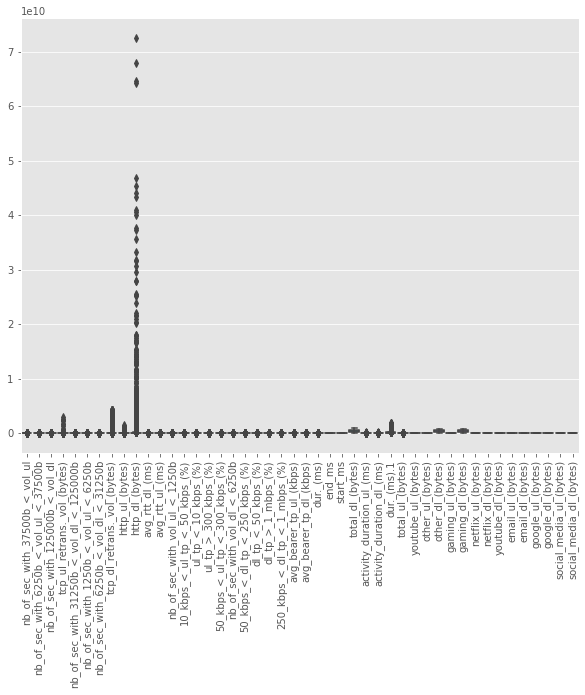

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
bp =sns.boxplot(data = df[numcols])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);

In [49]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_array = scaler.fit_transform(df[numcols])

In [50]:
scaled_data = pd.DataFrame(scaled_array, columns=numcols)
scaled_data.head()

nb_of_sec_with_37500b_<_vol_ul  nb_of_sec_with_6250b_<_vol_ul_<_37500b  \
0                            0.00                                   -0.00   
1                            0.00                                   -0.00   
2                            0.00                                   -0.00   
3                            0.00                                   -0.00   
4                            0.00                                   -0.00   

   nb_of_sec_with_125000b_<_vol_dl  tcp_ul_retrans._vol_(bytes)  \
0                             0.00                         0.00   
1                             0.00                         0.00   
2                             0.00                         0.00   
3                             0.00                         0.00   
4                             0.00                         0.00   

   nb_of_sec_with_31250b_<_vol_dl_<_125000b  \
0                                      0.00   
1                                      0.00   
2                                      0.00   
3                                      0.00   
4                                      0.00   

   nb_of_sec_with_1250b_<_vol_ul_<_6250b  \
0                                   0.00   
1                                   0.00   
2                                   0.00   
3                                   0.00   
4                                   0.00   

   nb_of_sec_with_6250b_<_vol_dl_<_31250b  tcp_dl_retrans._vol_(bytes)  \
0                                    0.00                         0.00   
1                                    0.00                         0.00   
2                                    0.00                         0.00   
3                                    0.00                         0.00   
4                                    0.00                         0.00   

       http_ul_(bytes)      http_dl_(bytes)      avg_rtt_dl_(ms)  \
0                 0.00                -0.00                -0.12   
1                 0.00                -0.00                -0.08   
2                 0.00                -0.00                 0.00   
3                 0.00                -0.00                 0.00   
4                 0.00                -0.00                 0.00   

       avg_rtt_ul_(ms)  nb_of_sec_with_vol_ul_<_1250b  \
0                -0.17                          -0.38   
1                -0.17                          -0.30   
2                 0.00                          -0.33   
3                 0.00                          -0.38   
4                 0.00                          -0.34   

   10_kbps_<_ul_tp_<_50_kbps_(%)  ul_tp_<_10_kbps_(%)  ul_tp_>_300_kbps_(%)  \
0                          -0.24                 0.32                 -0.06   
1                          -0.24                 0.32                 -0.06   
2                          -0.24                 0.32                 -0.06   
3                          -0.24                 0.32                 -0.06   
4                          -0.24                 0.32                 -0.06   

   50_kbps_<_ul_tp_<_300_kbps_(%)  nb_of_sec_with_vol_dl_<_6250b  \
0                           -0.09                          -0.38   
1                           -0.09                          -0.30   
2                           -0.09                          -0.32   
3                           -0.09                          -0.40   
4                           -0.09                          -0.34   

   50_kbps_<_dl_tp_<_250_kbps_(%)  dl_tp_<_50_kbps_(%)   dl_tp_>_1_mbps_(%)  \
0                           -0.50                 0.55                -0.33   
1                           -0.50                 0.55                -0.33   
2                           -0.50                 0.55                -0.33   
3                           -0.50                 0.55                -0.33   
4                           -0.50                 0.55                -0.33   

   250_kbps_<_dl_tp_<_1_mbps_(%) 

In [51]:
scaled_data.describe()

nb_of_sec_with_37500b_<_vol_ul  nb_of_sec_with_6250b_<_vol_ul_<_37500b  \
count                      150,001.00                              150,001.00   
mean                             0.00                                   -0.00   
std                              1.00                                    1.00   
min                             -0.34                                   -0.28   
25%                              0.00                                   -0.00   
50%                              0.00                                   -0.00   
75%                              0.00                                   -0.00   
max                            113.95                                   98.65   

       nb_of_sec_with_125000b_<_vol_dl  tcp_ul_retrans._vol_(bytes)  \
count                       150,001.00                   150,001.00   
mean                              0.00                        -0.00   
std                               1.00                         1.00   
min                              -0.66                        -0.05   
25%                              -0.30                        -0.04   
50%                               0.00                         0.00   
75%                               0.00                         0.00   
max                              53.44                       184.30   

       nb_of_sec_with_31250b_<_vol_dl_<_125000b  \
count                                150,001.00   
mean                                       0.00   
std                                        1.00   
min                                       -0.72   
25%                                       -0.32   
50%                                        0.00   
75%                                        0.00   
max                                       51.09   

       nb_of_sec_with_1250b_<_vol_ul_<_6250b  \
count                             150,001.00   
mean                                    0.00   
std                                     1.00   
min                                    -0.38   
25%                                    -0.25   
50%                                     0.00   
75%                                     0.00   
max                                    95.39   

       nb_of_sec_with_6250b_<_vol_dl_<_31250b  tcp_dl_retrans._vol_(bytes)  \
count                              150,001.00                   150,001.00   
mean                                     0.00                         0.00   
std                                      1.00                         1.00   
min                                     -0.77                        -0.18   
25%                                     -0.35                        -0.17   
50%                                      0.00                         0.00   
75%                                      0.00                         0.00   
max                                     52.84                        36.45   

           http_ul_(bytes)      http_dl_(bytes)      avg_rtt_dl_(ms)  \
count           150,001.00           150,001.00           150,001.00   
mean                  0.00                -0.00                 0.00   
std                   1.00                 1.00                 1.00   
min                  -0.25                -0.18                -0.20   
25%                  -0.22                -0.17                -0.13   
50%                   0.00                -0.00                -0.10   
75%                   0.00                -0.00                 0.00   
max                 112.82               111.23               173.08   

           avg_rtt_ul_(ms)  nb_of_sec_with_vol_ul_<_1250b  \
count           150,001.00                     150,001.00   
mean                  0.00                           0.00   
std                   1.00                           1.00   
min                  -0.23                          -0.40   
25%                  -0.19                          -0.39   
50%                  -0.14

All values are expressed as Z-score to help us identify our outliers easily

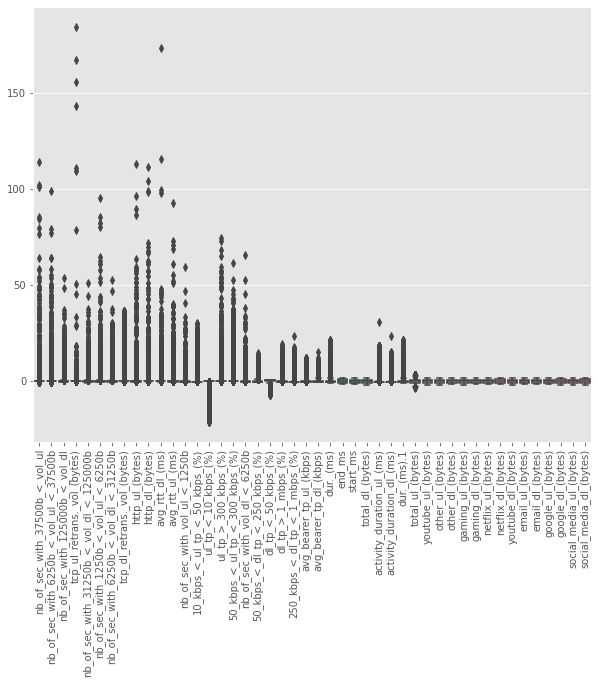

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
bp =sns.boxplot(data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);

I want to find the IQR for all the columns in our numerical Data

From the figure above there are no serious outliers in the columns in question, so we would go ahead with this analysis

In [ ]:
total_updown["Total Applications (bytes)"]= total_updown['social_media_total(bytes)'] + total_updown['google_total(bytes)']+ total_updown['email_total(bytes)']+ total_updown['youtube_total(bytes)']+ total_updown['netflix_total(bytes)']+ total_updown['gaming_total(bytes)']+ total_updown['other_total(bytes)']

### Graphical Univariate Analysis

Here i would be visualizing somthe important Columns using a Dist Plot, Histogram and Box Plot, 
This would help us understand how our data is distributed.

I would be plotting this for all the important data

In [ ]:
number of xDR sessions
Session duration
the total download (DL) and upload (UL) data
the total data volume for Applications 

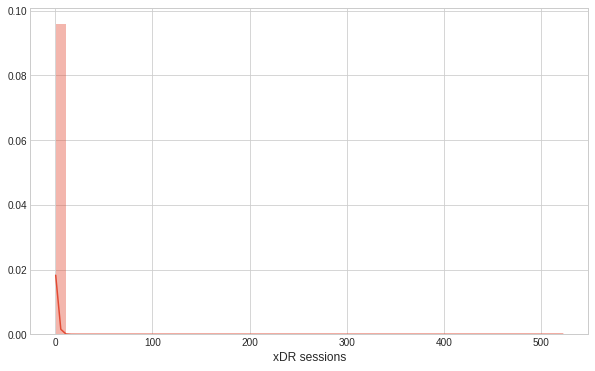

In [58]:
plt.subplots(figsize=(10, 6))
sns.distplot(NumberOfSessions["xDR sessions"], hist=True)

In [59]:
SessionDuration.head()

sessions duration(ms)
msisdn/number                           
33,601,001,722.00         116,720,140.00
33,601,001,754.00         181,230,963.00
33,601,002,511.00         134,969,374.00
33,601,007,832.00          49,878,024.00
33,601,008,617.00          37,104,453.00

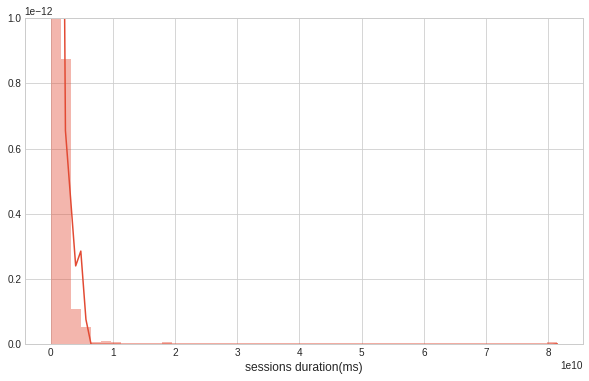

In [60]:
plt.subplots(figsize=(10, 6))
sns.distplot(SessionDuration["sessions duration(ms)"], hist=True)

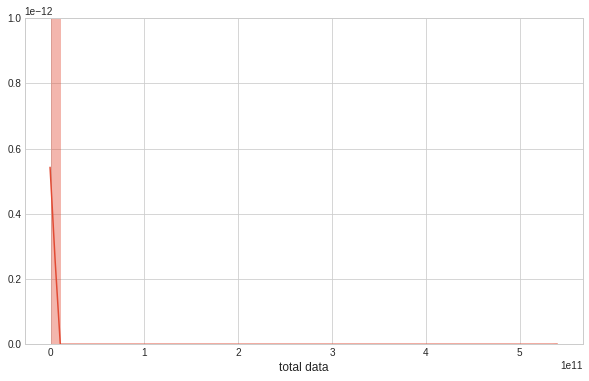

In [69]:
plt.subplots(figsize=(10, 6))
sns.distplot(UpDownload_user["total data"], hist=True)

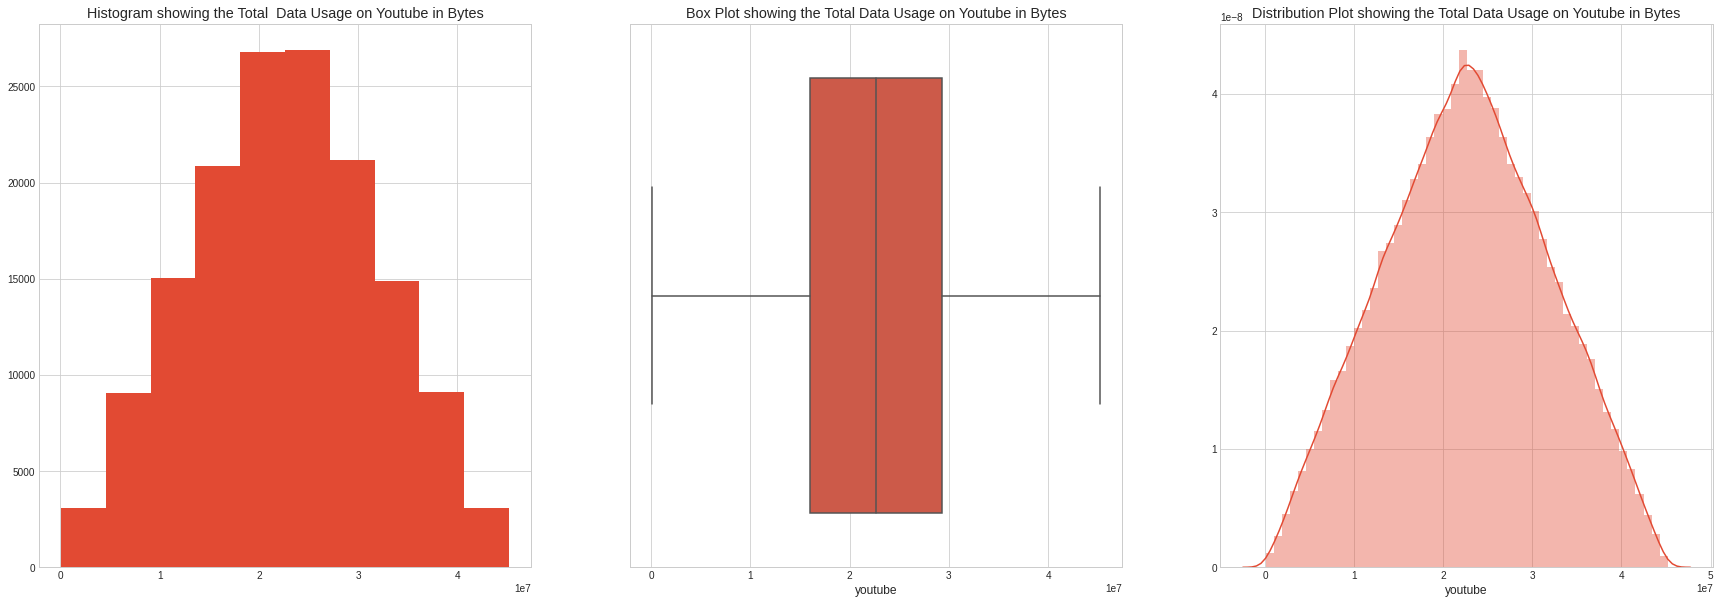

In [63]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["youtube"]);
sns.boxplot(df["youtube"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total  Data Usage on Youtube in Bytes')
ax[1].title.set_text('Box Plot showing the Total Data Usage on Youtube in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Data Usage on Youtube in Bytes')
sns.distplot(df["youtube"], ax=ax[2]);
fig.savefig('Youtube.jpeg')

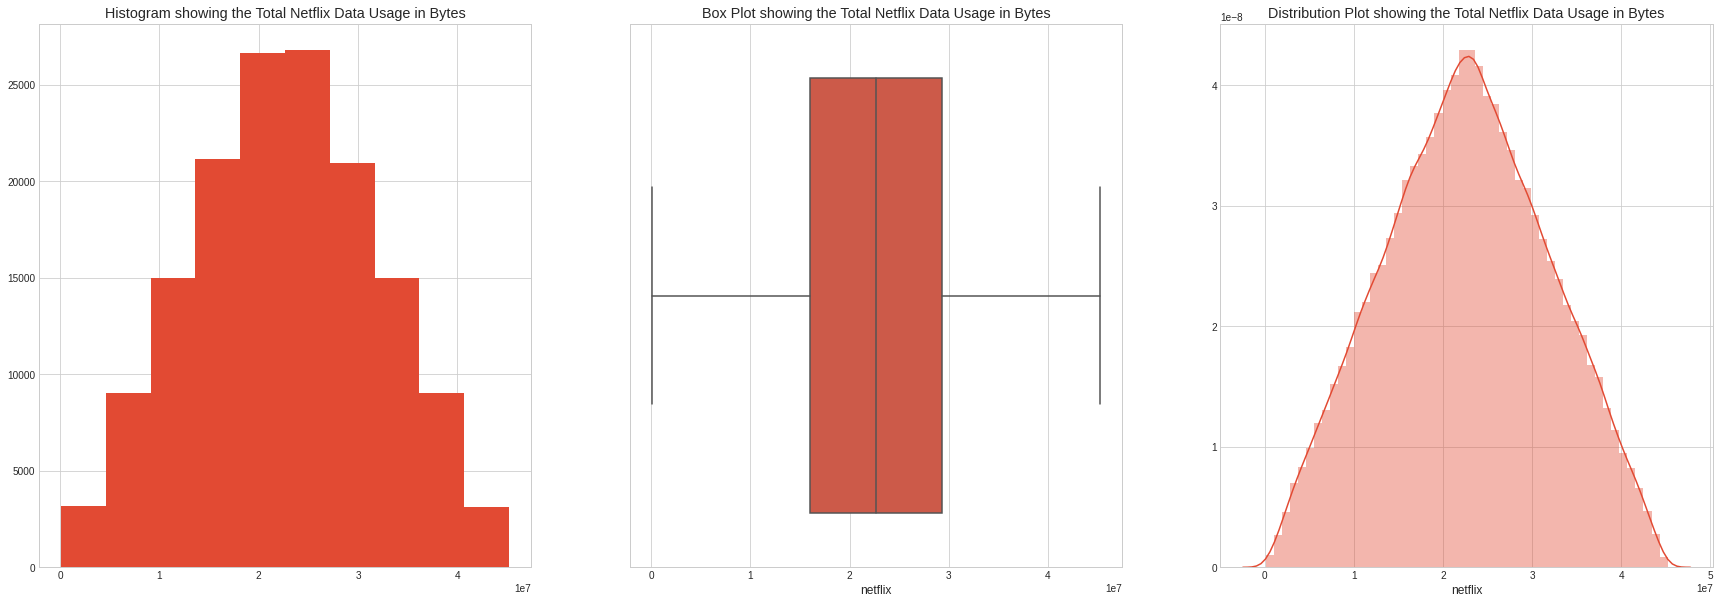

In [64]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["netflix"]);
sns.boxplot(df["netflix"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Netflix Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Netflix Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Netflix Data Usage in Bytes')
sns.distplot(df["netflix"], ax=ax[2]);
fig.savefig('netflix.jpeg')

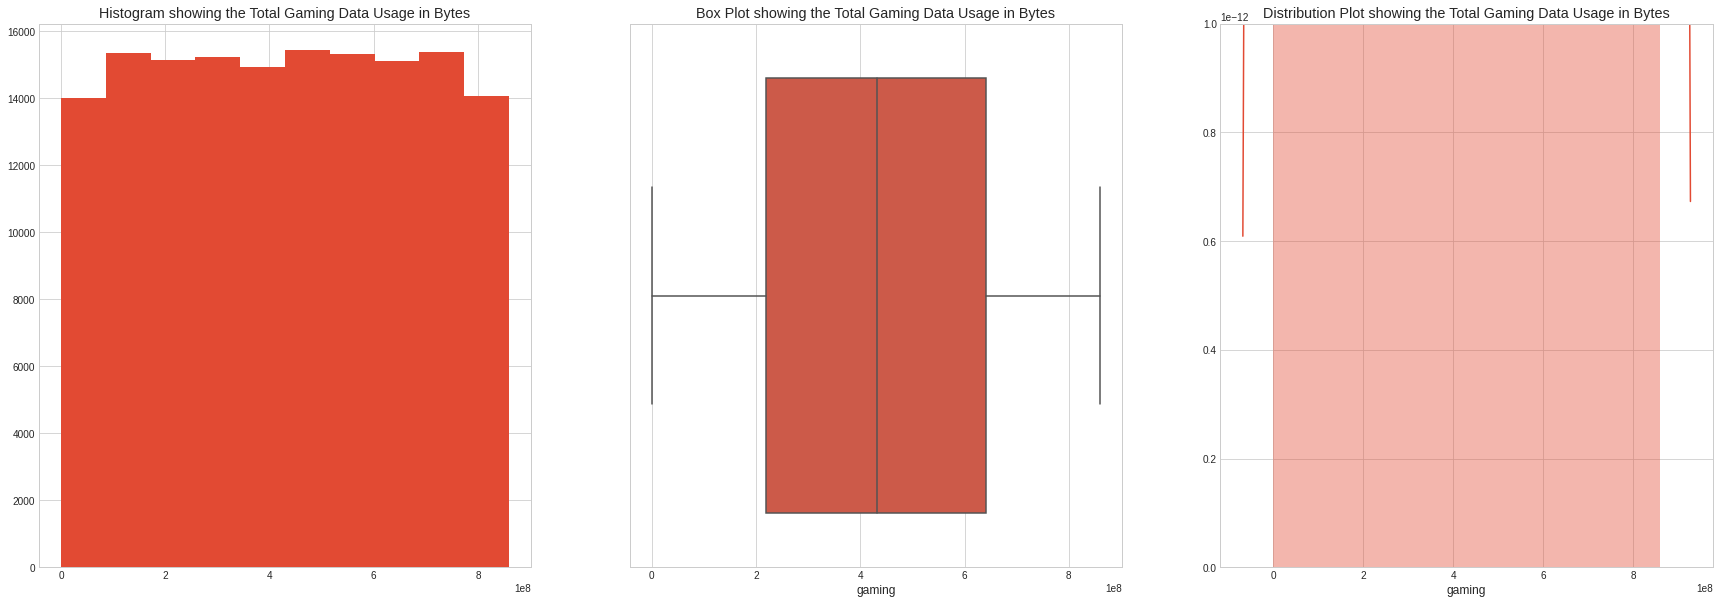

In [66]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["gaming"]);
sns.boxplot(df["gaming"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Gaming Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Gaming Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Gaming Data Usage in Bytes')
sns.distplot(df["gaming"], ax=ax[2]);
fig.savefig('gaming.jpeg')

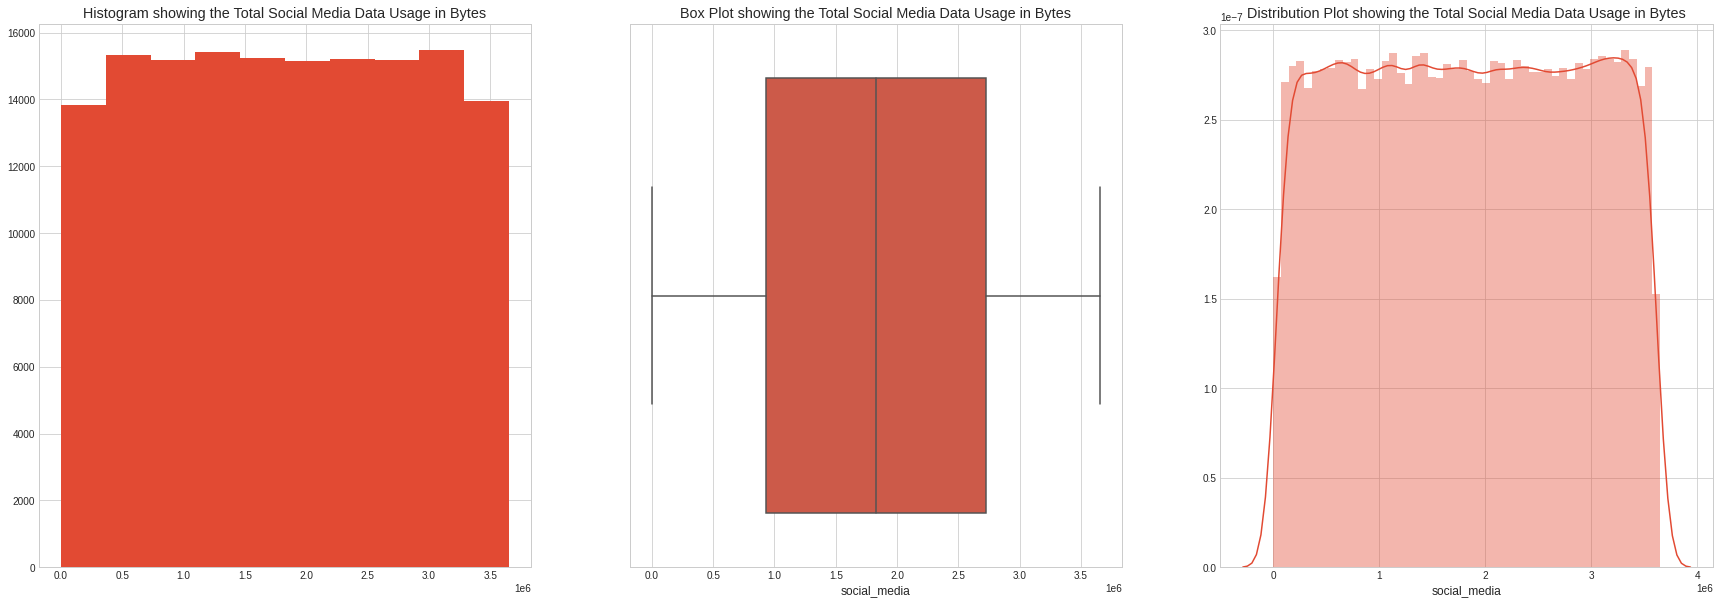

In [70]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["social_media"]);
sns.boxplot(df["social_media"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Social Media Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Social Media Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Social Media Data Usage in Bytes')
sns.distplot(df["social_media"], ax=ax[2]);
fig.savefig('social_media.jpeg')

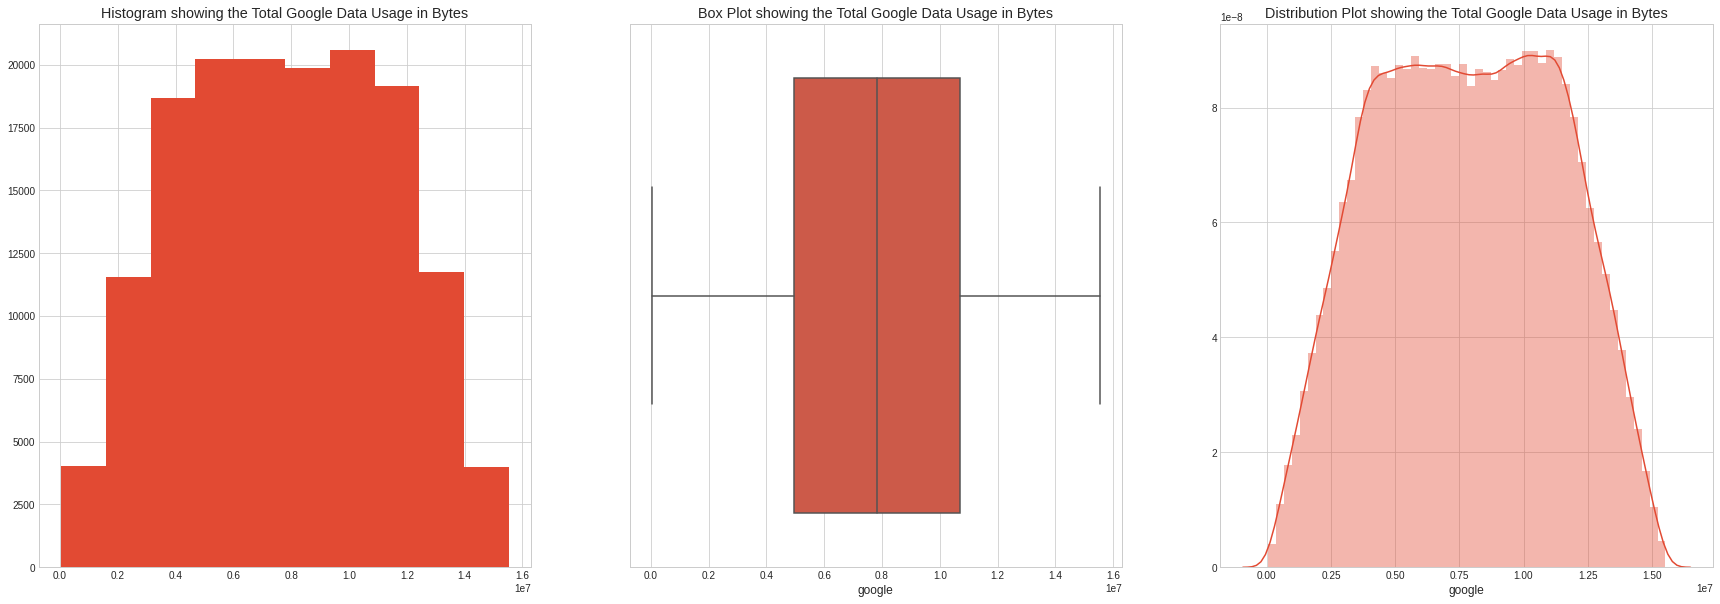

In [72]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["google"]);
sns.boxplot(df["google"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Google Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Google Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Google Data Usage in Bytes')
sns.distplot(df["google"], ax=ax[2]);
fig.savefig('google.jpeg')

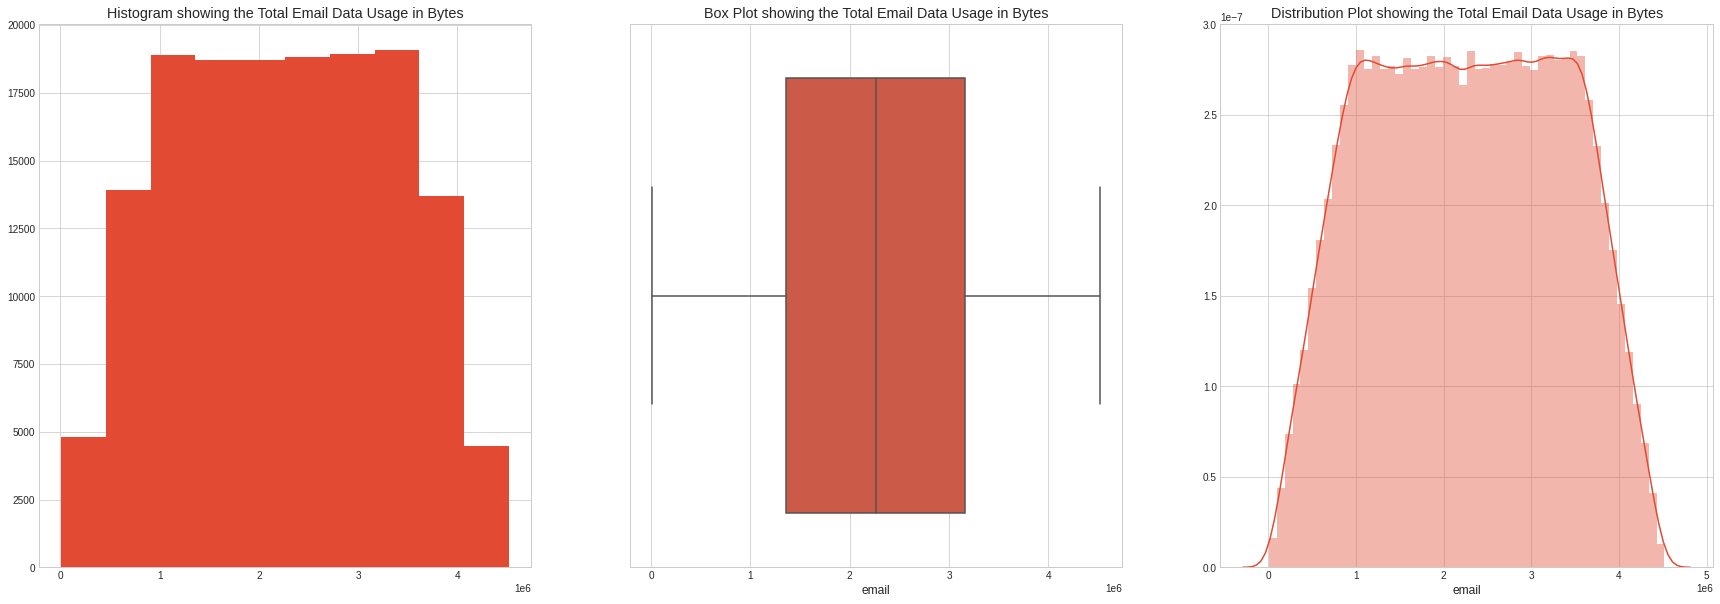

In [74]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["email"]);
sns.boxplot(df["email"], ax=ax[1]);
ax[0].title.set_text('Histogram showing the Total Email Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing the Total Email Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing the Total Email Data Usage in Bytes')
sns.distplot(df["email"], ax=ax[2]);
fig.savefig('email.jpeg')

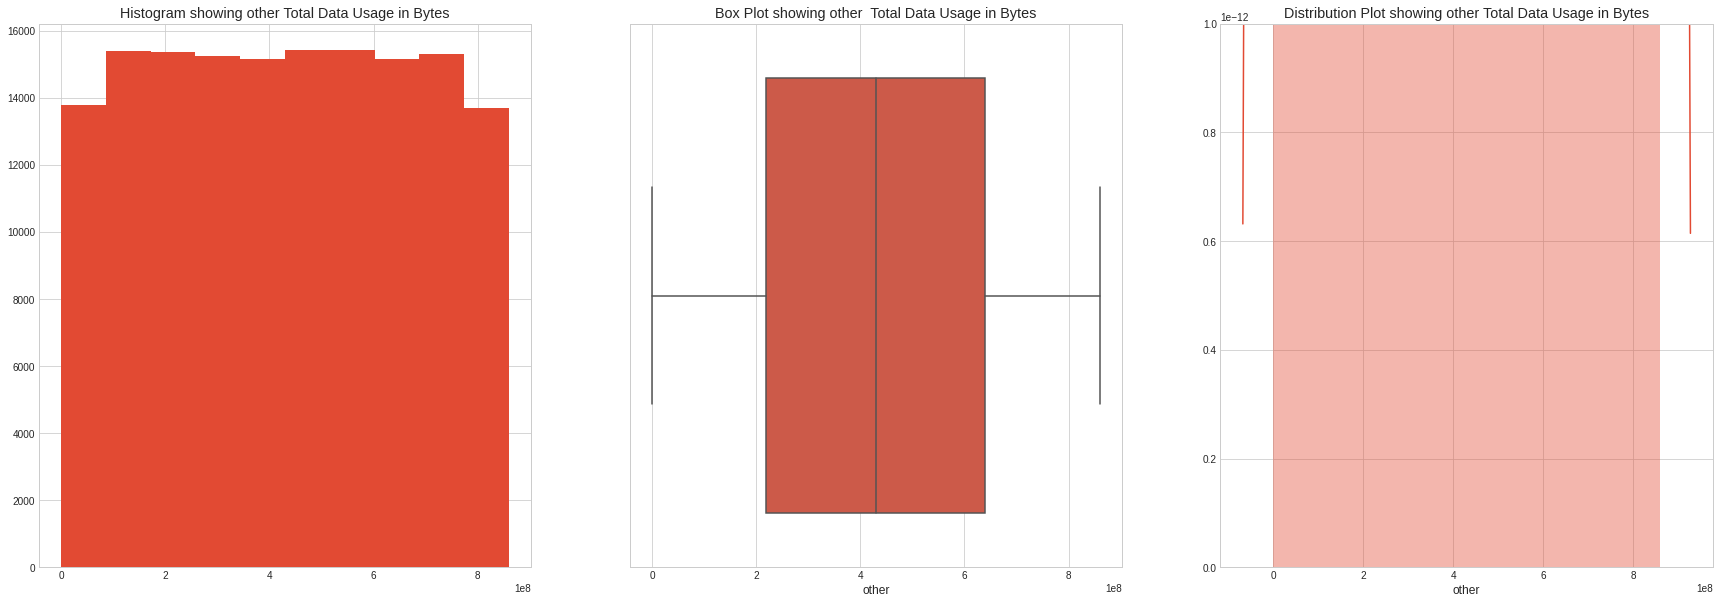

In [77]:
fig, ax = plt.subplots(1,3, figsize=(30, 10))
ax[0].hist(df["other"]);
sns.boxplot(df["other"], ax=ax[1]);
ax[0].title.set_text('Histogram showing other Total Data Usage in Bytes')
ax[1].title.set_text('Box Plot showing other  Total Data Usage in Bytes')
ax[2].title.set_text('Distribution Plot showing other Total Data Usage in Bytes')
sns.distplot(df["other"], ax=ax[2]);
fig.savefig('other.jpeg')

In [87]:

new = pd.DataFrame(applicationDownUp.sum(axis=0, skipna=True)).reset_index()
new= new.rename(columns={'index':"Applications",0:"Sum"})
new = new[1:8]

Text(0.5, 0, 'Application')

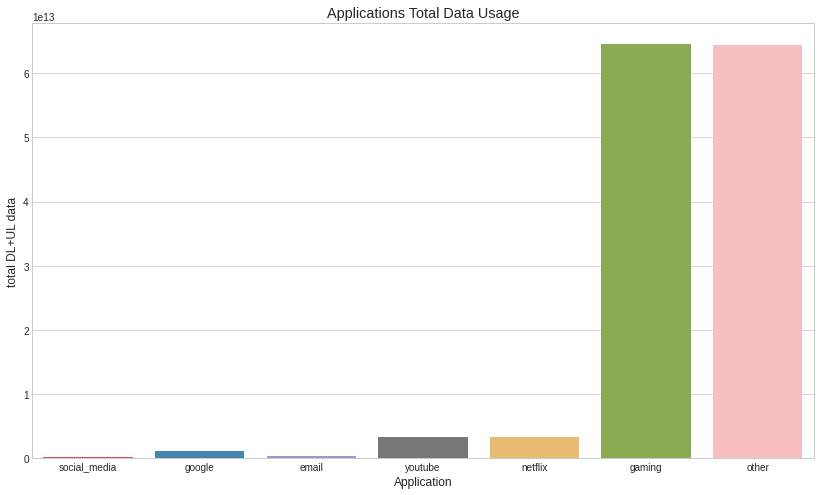

In [90]:
plt.figure(figsize=(14,8))
sns.barplot(x = new['Applications'], y = new['Sum'])
plt.title('Applications Total Data Usage')
plt.ylabel('total DL+UL data')
plt.xlabel('Application')

In [ ]:
df.to_csv()